## 使用梯度上升法实现PCA

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.empty((100, 2))
X[:,0] = np.random.uniform(0., 100., size=100)
X[:,1] = 0.75 * X[:,0] + 3. + np.random.normal(0, 10., size=100)

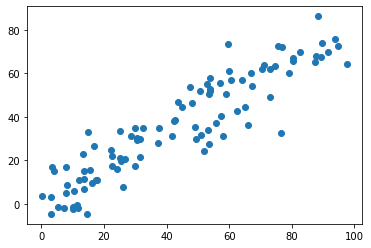

In [3]:
plt.scatter(X[:,0], X[:,1])
plt.show()

### demean 将矩阵均值归零

In [4]:
def demean(X):
    return X - np.mean(X, axis=0) # 行方向求均值 => 求每一列的均值

In [5]:
X_demean = demean(X)

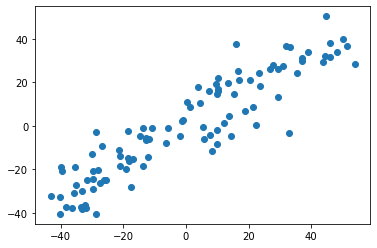

In [6]:
# demean 相当于把坐标轴移到中间
plt.scatter(X_demean[:,0], X_demean[:,1])
plt.show()

均值约等于0

In [7]:
np.mean(X_demean[:,0]) #第一个维度的均值

-1.9895196601282807e-15

In [8]:
np.mean(X_demean[:,1]) #第二个维度的均值

-1.1119993814645568e-14

### 梯度上升法

In [9]:
def f(w, X):
    return np.sum((X.dot(w)**2)) / len(X)

def df_math(w, X):
    return X.T.dot(X.dot(w)) * 2. / len(X)

def df_debug(w, X, epsilon=0.0001):
    res = np.empty(len(w))
    for i in range(len(w)):
        w_1 = w.copy()
        w_1[i] += epsilon
        w_2 = w.copy()
        w_2[i] -= epsilon
        res[i] = (f(w_1, X) - f(w_2, X)) / (2 * epsilon)
    return res
# w 是梯度向量，每个维度都是1 epsilon 取值小
def direction(w):
    return w / np.linalg.norm(w) # np.linalg.norm(w)   求w向量的模

def gradient_ascent(df, X, initial_w, eta, n_iters = 1e4, epsilon=1e-8):
    
    w = direction(initial_w) 
    cur_iter = 0

    while cur_iter < n_iters:
        gradient = df(w, X)
        last_w = w # w只代表方向, 单位向量, 模为1
        w = w + eta * gradient # 计算的w 模可能不为1
        w = direction(w) # 注意1：每次求一个单位方向
        if(abs(f(w, X) - f(last_w, X)) < epsilon):
            break
            
        cur_iter += 1

    return w

In [10]:
initial_w = np.random.random(X.shape[1]) # 注意2：不能用0向量开始, w=0本身就是极值点，不能代入
initial_w

array([0.1353573 , 0.99454723])

In [14]:
eta = 0.001
# 注意3： 不能使用StandardScaler标准化数据 (求不出最大方差，只使用demean平均,不标准化)

In [15]:
gradient_ascent(df_debug, X_demean, initial_w, eta)

array([0.76271439, 0.64673547])

In [16]:
gradient_ascent(df_math, X_demean, initial_w, eta)

array([0.76271439, 0.64673547])

In [18]:
w = gradient_ascent(df_math, X_demean, initial_w, eta)

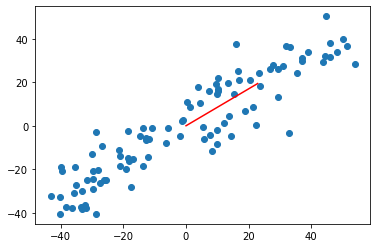

In [20]:
plt.scatter(X_demean[:,0], X_demean[:,1])
plt.plot([0, w[0]*30], [0, w[1]*30], color='r')
plt.show() #这个轴就是第一个主成分

### 使用极端数据集测试

In [21]:
X2 = np.empty((100, 2))
X2[:,0] = np.random.uniform(0., 100., size=100)
X2[:,1] = 0.75 * X2[:,0] + 3.

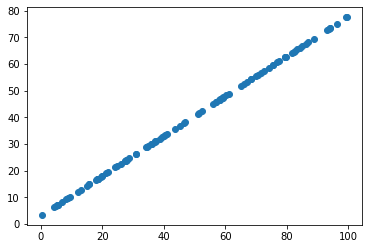

In [22]:
plt.scatter(X2[:,0], X2[:,1])
plt.show()

In [23]:
X2_demean = demean(X2)

In [24]:
w2 = gradient_ascent(df_math, X2_demean, initial_w, eta)

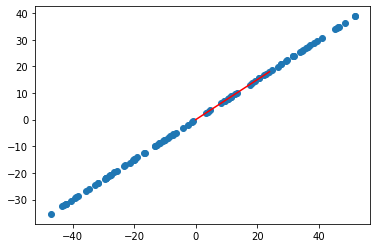

In [25]:
plt.scatter(X2_demean[:,0], X2_demean[:,1])
plt.plot([0, w2[0]*30], [0, w2[1]*30], color='r')
plt.show()

同学们可以自己思考实现随机梯度下降法和小批量梯度下降法的版本：）